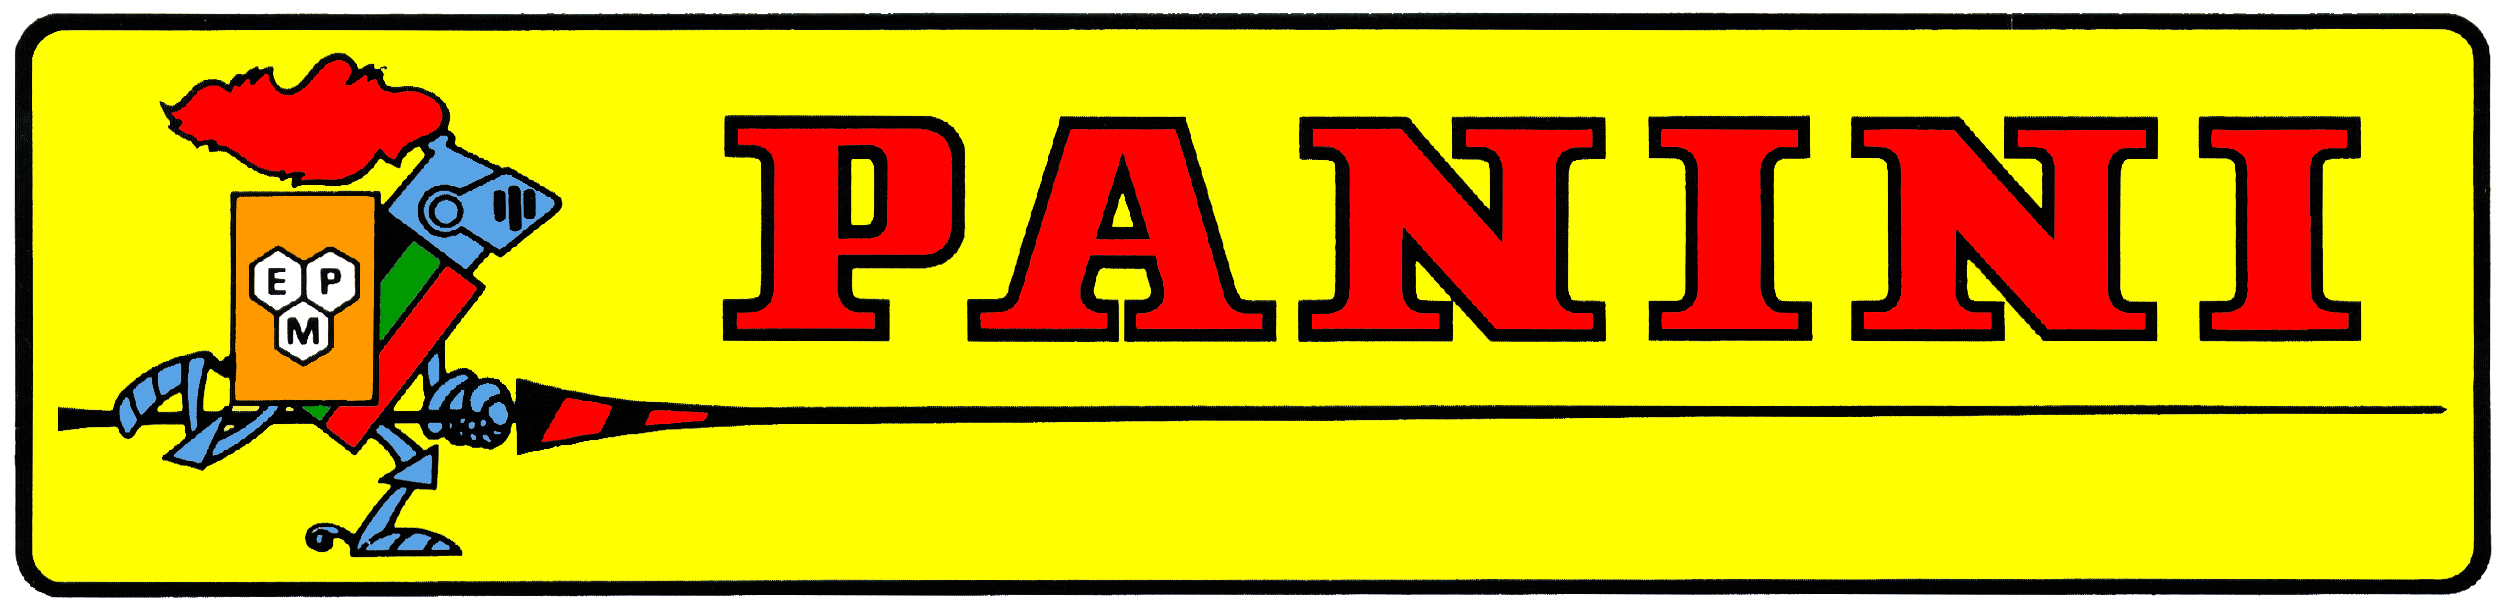

# Qatar FIFA World Cup Panini sticker collection simulator

It's 18th November 2022 and the FIFA World Cup is finally here! And with every World Cup, Panini releases a whole new ablum of player stickers containing players from each squad of the participating nations for football lovers to collect. The aim of the game is simple, you purchase sticker packs that can contain 5 random players from this years competition, add them to the album and repeat till the book is completed with all 683 players. Which begs the question, how many packs would you need to purchase in order to complete the album? 100? 250? 500?! We plan to answer this question today using our Python3 knowledge and the Monte Carlo method to simulate the sticker collection and calculate the usual statistical quantities of interest.

# Collection simulation

Our first job is to simulate the pack opening. This can be exectued by creating a random sample (assuming the probability distribution of the stickers is uniform) using the random module in Python, we select 5 random integers from [0,683] with replacement. We then add these 5 stickers to the collection using a for loop which we represent using a Numpy Array of ones by setting the value of the ith position to zero. 

In [4]:
import random
import numpy as np

single_card_collection = np.ones((683,), dtype = int)
pack = random.sample(range(0,638), 5)
for j in range(5):
    single_card_collection[pack[j]] = 0

Now we need to implement this in a function that takes a numpy array of ones as its argument, then simulates a single attempt of collecting all the stickers. To do this, we simulate 10000 pack openings and checking if the sum of all the elements in the array is zero and when it does returning the number of packs opened.

In [6]:
def single_sim_panini(single_card_collection):
    
    for i in range(10000):
        pack = random.sample(range(0,638), 5)
        for j in range(5):
            single_card_collection[pack[j]] = 0
        if np.sum(single_card_collection) == 0:
            break
    return i

We've successfully implemented a function to simulate a single collection attempt. However to gain some insight, we need to simulate many of these pack openings. In other words we need to make use of the Monte Carlo method to obtain the consistent and reliable quantites we want, by simulating many collection attempts. Luckily for us, this isn't too hard to implement.

# Many collection simulation attempts

To simulate may pack openings, we use the same approach we did in the single collection attempt, we create a for loop, which calls the single_sim_panini function n times and recording the number of packs opened within a numpy array.

In [7]:
def many_sim_panini(n):
    record_of_packs_opened = np.zeros((n,), dtype = int)
    for i in range(n):
        collect_attempt = np.ones((638,), dtype = int)
        pack_attempt = single_sim_panini(collect_attempt)
        record_of_packs_opened[i] = pack_attempt
    return record_of_packs_opened

To calculate a cost for each attempt we iterate through the record_of_packs_opened multiplying each value by the cost of a single pack (£0.80) and store this value in a numpy array.

In [8]:
def many_sim_panini_cost(record_of_packs_opened):
    n = len(record_of_packs_opened)
    cost = 0.80
    record_of_cost = np.zeros((n,), dtype = int)
    for i in range(n):
        record_of_cost[i] = record_of_packs_opened[i] * cost
    return record_of_cost

# Statistical Analysis

We store the results of 10000 collection attempts in two varaibles by calling the functions we made earlier:

In [9]:
pack_data = many_sim_panini(10000)
cost_data = many_sim_panini_cost(pack_data)

We can create histogram plots of our newly found data with the help of Matplotlib:

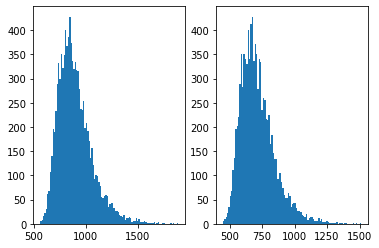

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.hist(pack_data, bins = 100)
plt.subplot(1,2,2)
plt.hist(cost_data, bins = 100)
plt.show()

and with the help of numpy we can retrieve the statistical quantities of interest we want:

In [12]:
# Statistical quantites (packs).
mu_pack = np.mean(pack_data)
sigma_pack = np.std(pack_data)
LQ_pack = np.quantile(pack_data, 0.25)
median_pack = np.median(pack_data)
UQ_pack = np.quantile(pack_data, 0.75)

# Statistical quantities (cost).
mu_cost = np.mean(cost_data)
sigma_cost = np.std(cost_data)
LQ_cost = np.quantile(cost_data, 0.25)
median_cost = np.median(cost_data)
UQ_cost = np.quantile(cost_data, 0.75)

In [27]:
print("The mean number of packs required to collect all the stickers is: " + str(mu_pack))
print("The standard deviation of packs required to collect all the stickers is: " + str(sigma_pack))
print("The quartiles of packs opened are: 25%: " + str(LQ_pack) + ", 50%: " + str(median_pack) + ", 75%: " + str(UQ_pack))

The mean number of packs required to collect all the stickers is: 894.5264
The standard deviation of packs required to collect all the stickers is: 163.7134621924538
The quartiles of packs opened are: 25%: 778.0, 50%: 866.0, 75%: 980.0


In [28]:
print("The mean cost to collect all the stickers is: " + str(mu_cost))
print("The standard deviation of cost to collect all the stickers is: " + str(sigma_cost))
print("The quartiles of cost are: 25%: " + str(LQ_cost) + ", 50%: " + str(median_cost) + ", 75%: " + str(UQ_cost))

The mean cost to collect all the stickers is: 715.2251
The standard deviation of cost to collect all the stickers is: 130.96985160711606
The quartiles of cost are: 25%: 622.0, 50%: 692.0, 75%: 784.0


So there we have it, to fill the Fifa World Cup 2022 Panini sticker album we need on average 895 packs costing £715.23, Yikes. Luckily, theres always eBay and swaps to rely upon if the price sounds rather scary.